In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import lightgbm as lgb

In [2]:
data = pd.read_csv("insurance_claims.csv")

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.drop('_c39',axis=1,inplace=True)

In [5]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [6]:
data.drop('policy_bind_date', axis = 1,inplace=True)

In [7]:
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [8]:
one_hot_encoded_data = pd.get_dummies(data['policy_state'], columns = ['OH', 'IN', 'IL'])
print(one_hot_encoded_data)

     IL  IN  OH
0     0   0   1
1     0   1   0
2     0   0   1
3     1   0   0
4     1   0   0
..   ..  ..  ..
995   0   0   1
996   1   0   0
997   0   0   1
998   1   0   0
999   0   0   1

[1000 rows x 3 columns]


In [9]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [10]:
data2=data.drop(['policy_state','auto_model'],axis=1)

In [11]:
data = pd.concat([data2, one_hot_encoded_data], axis=1)

In [12]:
data

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,IL,IN,OH
0,328,48,521585,250/500,1000,1406.91,0,466132,MALE,MD,...,71610,6510,13020,52080,Saab,2004,Y,0,0,1
1,228,42,342868,250/500,2000,1197.22,5000000,468176,MALE,MD,...,5070,780,780,3510,Mercedes,2007,Y,0,1,0
2,134,29,687698,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,34650,7700,3850,23100,Dodge,2007,N,0,0,1
3,256,41,227811,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,63400,6340,6340,50720,Chevrolet,2014,Y,1,0,0
4,228,44,367455,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,6500,1300,650,4550,Accura,2009,N,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,87200,17440,8720,61040,Honda,2006,N,0,0,1
996,285,41,186934,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,108480,18080,18080,72320,Volkswagen,2015,N,1,0,0
997,130,34,918516,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,67500,7500,7500,52500,Suburu,1996,N,0,0,1
998,458,62,533940,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,46980,5220,5220,36540,Audi,1998,N,1,0,0


In [13]:
data.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_csl  policy_deductable  \
0                   328   48         521585    250/500               1000   
1                   228   42         342868    250/500               2000   
2                   134   29         687698    100/300               2000   
3                   256   41         227811    250/500               2000   
4                   228   44         367455   500/1000               1000   
..                  ...  ...            ...        ...                ...   
995                   3   38         941851   500/1000               1000   
996                 285   41         186934    100/300               1000   
997                 130   34         918516    250/500                500   
998                 458   62         533940   500/1000               2000   
999                 456   60         556080    250/500               1000   

     policy_annual_premium  umbrella_limit 

In [14]:
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [15]:
data.drop(['auto_make', 'auto_year'],axis=1,inplace=True)

In [16]:
data.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_csl  policy_deductable  \
0                   328   48         521585    250/500               1000   
1                   228   42         342868    250/500               2000   
2                   134   29         687698    100/300               2000   
3                   256   41         227811    250/500               2000   
4                   228   44         367455   500/1000               1000   
..                  ...  ...            ...        ...                ...   
995                   3   38         941851   500/1000               1000   
996                 285   41         186934    100/300               1000   
997                 130   34         918516    250/500                500   
998                 458   62         533940   500/1000               2000   
999                 456   60         556080    250/500               1000   

     policy_annual_premium  umbrella_limit 

In [17]:
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [18]:
one_hot_encoded_data1 = pd.get_dummies(data['insured_education_level'], columns = ['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'])
print(one_hot_encoded_data1)

     Associate  College  High School  JD  MD  Masters  PhD
0            0        0            0   0   1        0    0
1            0        0            0   0   1        0    0
2            0        0            0   0   0        0    1
3            0        0            0   0   0        0    1
4            1        0            0   0   0        0    0
..         ...      ...          ...  ..  ..      ...  ...
995          0        0            0   0   0        1    0
996          0        0            0   0   0        0    1
997          0        0            0   0   0        1    0
998          1        0            0   0   0        0    0
999          1        0            0   0   0        0    0

[1000 rows x 7 columns]


In [19]:
data3=data.drop(['insured_education_level'],axis=1)

In [20]:
data = pd.concat([data3, one_hot_encoded_data1], axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [22]:
a=data['incident_state'].dtype
  

In [23]:
print(a)

object


In [24]:
data4=data.drop(['incident_date','incident_type','incident_location','policy_csl','insured_hobbies','insured_relationship', 'insured_occupation', 'insured_relationship','collision_type','incident_state','incident_city','authorities_contacted'],axis=1)

In [25]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_severity            1000 non-null   object 
 11  incident_hour_of_the_day     1000 non-null   int64  
 12  number_of_vehicles_involved  1000 non-null   int64  
 13  property_damage    

In [26]:
data4.insured_sex.replace('MALE',0,inplace=True)
data4.insured_sex.replace('FEMALE',1,inplace=True)

In [27]:
data4.insured_sex.head()

0    0
1    0
2    1
3    1
4    0
Name: insured_sex, dtype: int64

In [28]:
data4.incident_severity.unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [29]:
one_hot_encoded_data3 = pd.get_dummies(data4['incident_severity'], columns = ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'])
print(one_hot_encoded_data3)

     Major Damage  Minor Damage  Total Loss  Trivial Damage
0               1             0           0               0
1               0             1           0               0
2               0             1           0               0
3               1             0           0               0
4               0             1           0               0
..            ...           ...         ...             ...
995             0             1           0               0
996             1             0           0               0
997             0             1           0               0
998             1             0           0               0
999             0             1           0               0

[1000 rows x 4 columns]


In [30]:
data4=data4.drop(['incident_severity'],axis=1)

In [31]:
data4 = pd.concat([data4, one_hot_encoded_data3], axis=1)

In [32]:
def print_unique_col_values(df): 
    for column in df:
        if df[column].dtypes != 'object':
            print(f'(column) : {df[column].unique()}')

In [33]:
print_unique_col_values(data4)

(column) : [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273

In [34]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   int64  
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_hour_of_the_day     1000 non-null   int64  
 11  number_of_vehicles_involved  1000 non-null   int64  
 12  property_damage              1000 non-null   object 
 13  bodily_injuries    

In [35]:
data4.drop(['property_damage'],axis=1, inplace=True)

In [36]:
data4.drop(['police_report_available'],axis=1, inplace=True)

In [37]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   int64  
 8   capital-gains                1000 non-null   int64  
 9   capital-loss                 1000 non-null   int64  
 10  incident_hour_of_the_day     1000 non-null   int64  
 11  number_of_vehicles_involved  1000 non-null   int64  
 12  bodily_injuries              1000 non-null   int64  
 13  witnesses          

In [38]:
data4.fraud_reported.replace('Y',1,inplace=True)
data4.fraud_reported.replace('N',0,inplace=True)

In [39]:
print_unique_col_values(data4)

(column) : [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309 396 273

In [40]:
data4.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,College,High School,JD,MD,Masters,PhD,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,328,48,521585,1000,1406.91,0,466132,0,53300,0,...,0,0,0,1,0,0,1,0,0,0
1,228,42,342868,2000,1197.22,5000000,468176,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,134,29,687698,2000,1413.14,5000000,430632,1,35100,0,...,0,0,0,0,0,1,0,1,0,0
3,256,41,227811,2000,1415.74,6000000,608117,1,48900,-62400,...,0,0,0,0,0,1,1,0,0,0
4,228,44,367455,1000,1583.91,6000000,610706,0,66000,-46000,...,0,0,0,0,0,0,0,1,0,0


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(data4))
MinMaxScaler()


MinMaxScaler()


MinMaxScaler()

In [42]:
print(scaler.transform(data4))
data5 = scaler.transform(data4)

[[0.68475992 0.64444444 0.4682467  ... 0.         0.         0.        ]
 [0.47599165 0.51111111 0.26936974 ... 1.         0.         0.        ]
 [0.27974948 0.22222222 0.65309788 ... 1.         0.         0.        ]
 ...
 [0.27139875 0.33333333 0.90995303 ... 1.         0.         0.        ]
 [0.95615866 0.95555556 0.48199539 ... 0.         0.         0.        ]
 [0.9519833  0.91111111 0.50663287 ... 1.         0.         0.        ]]


In [43]:
print([columns for columns in data4])

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported', 'IL', 'IN', 'OH', 'Associate', 'College', 'High School', 'JD', 'MD', 'Masters', 'PhD', 'Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']


In [44]:
df = pd. DataFrame(data5, columns=[columns for columns in data4]) 

In [45]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,...,College,High School,JD,MD,Masters,PhD,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,0.684760,0.644444,0.468247,0.333333,0.603112,0.090909,0.188769,0.0,0.530348,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.475992,0.511111,0.269370,1.000000,0.473214,0.545455,0.199478,0.0,0.000000,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.279749,0.222222,0.653098,1.000000,0.606972,0.545455,0.002766,1.0,0.349254,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.534447,0.488889,0.141334,1.000000,0.608582,0.636364,0.932699,1.0,0.486567,0.438344,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.475992,0.555556,0.296730,0.333333,0.712760,0.636364,0.946264,0.0,0.656716,0.585959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
X = df.drop(columns='fraud_reported', axis=1)
Y = df['fraud_reported']
Y.shape

(1000,)

In [47]:
Y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: fraud_reported, dtype: float64

In [48]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(X,Y)
Y_sm.value_counts()


1.0    753
0.0    753
Name: fraud_reported, dtype: int64

In [49]:
Y_sm.shape

(1506,)

In [50]:
X_sm.shape

(1506, 32)

In [51]:
X_sm['witnesses']


0       0.666667
1       0.000000
2       1.000000
3       0.666667
4       0.333333
          ...   
1501    0.333333
1502    0.519998
1503    0.314970
1504    0.697433
1505    0.905521
Name: witnesses, Length: 1506, dtype: float64

In [52]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_sm, Y_sm, test_size=0.2, stratify=Y_sm, random_state=2)


In [53]:
print(X_sm.shape, X_train.shape, X_test.shape)

(1506, 32) (1204, 32) (302, 32)


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
model1 = LogisticRegression()

In [56]:
model1.fit(X_train, Y_train)

LogisticRegression()

In [57]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [58]:
X_test_prediction = model1.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [59]:
print('Accuracy score on Test Data : ', testing_data_accuracy)

Accuracy score on Test Data :  0.7748344370860927


In [60]:
yp_logistic = model1.predict(X_test)

In [61]:
yp_logistic

array([1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0.

# ANN

In [62]:
X_train.shape

(1204, 32)

In [63]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,),activation = 'relu'),
    keras.layers.Dense(16, input_shape=(32,),activation = 'relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
38/38 [==============================] - 1s 1ms/step - loss: 0.7015 - accuracy: 0.5532
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.6273 - accuracy: 0.6935
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7558
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.5289 - accuracy: 0.7691
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.7799
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7865
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7841
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7857
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7890
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7965
Epoch 11/

Epoch 83/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1467 - accuracy: 0.9535
Epoch 84/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9518
Epoch 85/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1393 - accuracy: 0.9610
Epoch 86/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1378 - accuracy: 0.9527
Epoch 87/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9593
Epoch 88/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9560
Epoch 89/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9651
Epoch 90/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1274 - accuracy: 0.9635
Epoch 91/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9635
Epoch 92/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1251 - accuracy: 0.9576


In [64]:
model.evaluate(X_test, Y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8146


[0.5428436398506165, 0.8145695328712463]

In [65]:
Y_sm.value_counts()

1.0    753
0.0    753
Name: fraud_reported, dtype: int64

In [66]:
yp = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [67]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [68]:
y_pred[:10]

[1, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [69]:
Y_test[:10]

C:\Users\Dell\AppData\Local\Temp\ipykernel_13840\418425187.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  Y_test[:10]


927     1.0
768     0.0
32      0.0
436     0.0
831     1.0
1267    1.0
354     0.0
313     0.0
234     1.0
757     0.0
Name: fraud_reported, dtype: float64

In [70]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(Y_test , y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.73      0.80       151
         1.0       0.77      0.90      0.83       151

    accuracy                           0.81       302
   macro avg       0.82      0.81      0.81       302
weighted avg       0.82      0.81      0.81       302



Text(69.0, 0.5, 'Truth')

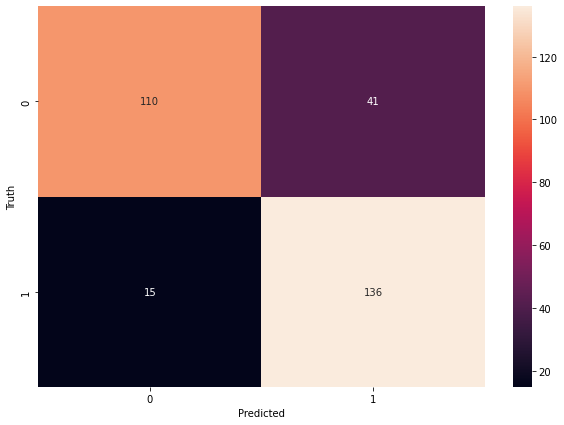

In [71]:
import matplotlib.pyplot as plt
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions =y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

def train_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [74]:
def prediction(X_test, model):
  
    # Predicton on test with giniIndex
    y_pred = model.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))



In [75]:
clf_gini = train_using_gini(X_train, X_test, Y_train)
clf_entropy = train_using_entropy(X_train, X_test, Y_train)

In [76]:
print("Results Using Gini Index:")
      
# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(Y_test, y_pred_gini)
print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(Y_test, y_pred_entropy)
      

Results Using Gini Index:
Predicted values:
[1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.]
Confusion Matrix:  [[125  26]
 [ 33 

In [77]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [78]:
X_train_prediction_svm = clf.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

In [79]:
print(f'accuracy score: {training_data_accuracy_svm}')

accuracy score: 0.7757475083056479


In [80]:
y_pred_svc = clf.predict(X_test)
print( cal_accuracy(Y_test, y_pred_svc))

Confusion Matrix:  [[127  24]
 [ 42 109]]
Accuracy :  78.1456953642384
Report :                precision    recall  f1-score   support

         0.0       0.75      0.84      0.79       151
         1.0       0.82      0.72      0.77       151

    accuracy                           0.78       302
   macro avg       0.79      0.78      0.78       302
weighted avg       0.79      0.78      0.78       302

None


# Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB


In [82]:
gnb = GaussianNB()

In [83]:
y_pred_nb = gnb.fit(X_train, Y_train).predict(X_test)

In [84]:
print( cal_accuracy(Y_test, y_pred_nb))

Confusion Matrix:  [[118  33]
 [ 32 119]]
Accuracy :  78.47682119205298
Report :                precision    recall  f1-score   support

         0.0       0.79      0.78      0.78       151
         1.0       0.78      0.79      0.79       151

    accuracy                           0.78       302
   macro avg       0.78      0.78      0.78       302
weighted avg       0.78      0.78      0.78       302

None


In [85]:
print(f"Accuracy score by different models are :\n Logistic Regression: {accuracy_score(yp_logistic, Y_test)*100}\n Neural networks {accuracy_score(Y_test,y_pred)*100} \n Decision Trees: {accuracy_score(Y_test,y_pred_entropy)*100} \n Support Vector Machine: {accuracy_score(Y_test, y_pred_svc)*100} \n Naive_Bayes: {accuracy_score(Y_test, y_pred_nb)*100}")

Accuracy score by different models are :
 Logistic Regression: 77.48344370860927
 Neural networks 81.45695364238411 
 Decision Trees: 77.48344370860927 
 Support Vector Machine: 78.1456953642384 
 Naive_Bayes: 78.47682119205298
